In [2]:
import requests
import json

def analyzeText(url):
    api_url = "http://gateway-a.watsonplatform.net/calls/url/URLGetRankedNamedEntities"
    api_key = '3d0b6858f7ef32fdf27ad402f4a9c270c9685d84'
    headers = {
        "Accept": "application/json"
    }
    parameters = {
        'outputMode': 'json',
        'apikey' : api_key,
        'sentiment' : 1,
        'knowledgeGraph': 0,
        'url': url,
        'disambiguate': 0
    }
    resp = requests.post(api_url, params=parameters, headers=headers)
    data = json.loads(resp.text)
    
    return data


In [3]:
text_url = 'https://www.washingtonpost.com/politics/rubio-endures-an-assault-in-a-rollicking-republican-debate/2016/02/06/d8a9bd60-cc5b-11e5-a7b2-5a2f824b02c9_story.html'

results = analyzeText(text_url) 

In [4]:
results.keys()

[u'status', u'totalTransactions', u'language', u'url', u'entities', u'usage']

In [5]:
results["entities"]

[{u'count': u'20',
  u'relevance': u'0.940885',
  u'sentiment': {u'mixed': u'1', u'score': u'0.0465971', u'type': u'positive'},
  u'text': u'Donald Trump',
  u'type': u'Person'},
 {u'count': u'16',
  u'relevance': u'0.722885',
  u'sentiment': {u'score': u'-0.590129', u'type': u'negative'},
  u'text': u'Marco Rubio',
  u'type': u'Person'},
 {u'count': u'9',
  u'relevance': u'0.472516',
  u'sentiment': {u'score': u'-0.605079', u'type': u'negative'},
  u'text': u'Jeb Bush',
  u'type': u'Person'},
 {u'count': u'9',
  u'relevance': u'0.425278',
  u'sentiment': {u'mixed': u'1', u'score': u'-0.419991', u'type': u'negative'},
  u'text': u'Gov. Chris Christie',
  u'type': u'Person'},
 {u'count': u'13',
  u'relevance': u'0.419378',
  u'sentiment': {u'score': u'-0.308842', u'type': u'negative'},
  u'text': u'Sen. Ted Cruz',
  u'type': u'Person'},
 {u'count': u'5',
  u'relevance': u'0.343615',
  u'sentiment': {u'mixed': u'1', u'score': u'-0.322349', u'type': u'negative'},
  u'text': u'New Hampshir

In [7]:
import pandas
from pandas.io.json import json_normalize

df = json_normalize(results["entities"])
df.head(5)

,count,relevance,sentiment.mixed,sentiment.score,sentiment.type,text,type
0,20,0.940885,1,0.0465971,positive,Donald Trump,Person
1,16,0.722885,NaN,-0.590129,negative,Marco Rubio,Person
2,9,0.472516,NaN,-0.605079,negative,Jeb Bush,Person
3,9,0.425278,1,-0.419991,negative,Gov. Chris Christie,Person
4,13,0.419378,NaN,-0.308842,negative,Sen. Ted Cruz,Person


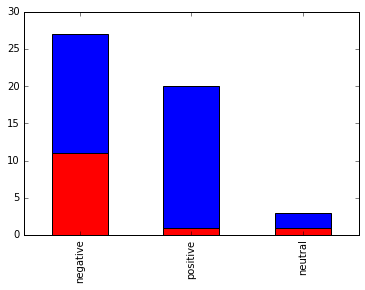

In [18]:
%matplotlib inline
plot1 = df["sentiment.type"].value_counts().plot(kind='bar')
isPerson = (df["type"] == 'Person')
persons = df[isPerson]
persons["sentiment.type"].value_counts().plot(kind='bar', color='Red', ax=plot1)

In [21]:
df.dtypes

count              object
relevance          object
sentiment.mixed    object
sentiment.score    object
sentiment.type     object
text               object
type               object
dtype: object

In [24]:
df["count"] = pandas.to_numeric(df["count"])
df["relevance"] = pandas.to_numeric(df["relevance"])
df["sentiment.score"] = pandas.to_numeric(df["sentiment.score"])

In [25]:
df.dtypes

count                int64
relevance          float64
sentiment.mixed     object
sentiment.score    float64
sentiment.type      object
text                object
type                object
dtype: object

In [26]:
df.describe()

,count,relevance,sentiment.score
count,50.000000,50.000000,30.000000
mean,2.820000,0.247908,-0.395635
std,3.977949,0.140808,0.242585
min,1.000000,0.156684,-0.878812
25%,1.000000,0.176470,-0.523245
50%,1.000000,0.207045,-0.441082
75%,2.000000,0.238866,-0.310560
max,20.000000,0.940885,0.245415


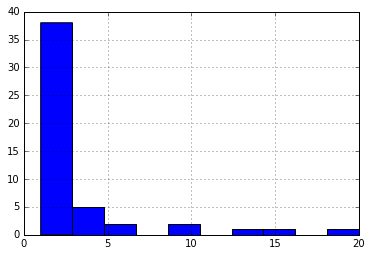

In [27]:
df["count"].hist()

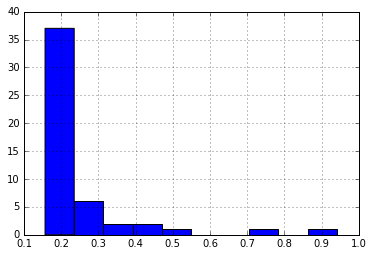

In [28]:
df["relevance"].hist()

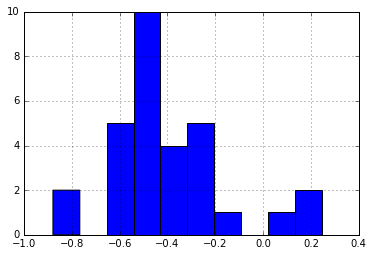

In [33]:
df["sentiment.score"].hist()

In [48]:
# And not let's rewrite our function to return directly a dataframe

import requests
import json
import pandas
from pandas.io.json import json_normalize


def analyzeText2(url):
    api_url = "http://gateway-a.watsonplatform.net/calls/url/URLGetRankedNamedEntities"
    api_key = '3d0b6858f7ef32fdf27ad402f4a9c270c9685d84'
    headers = {
        "Accept": "application/json"
    }
    parameters = {
        'outputMode': 'json',
        'apikey' : api_key,
        'sentiment' : 1,
        'knowledgeGraph': 0,
        'url': url,
        'disambiguate': 0
    }
    resp = requests.post(api_url, params=parameters, headers=headers)
    data = json.loads(resp.text)
    
    # We get only the "entities" list since it contains
    # the data that we care about
    df = json_normalize(data["entities"])
    
    # We do a little bit of housecleaning and define 
    # proper data types for the data frame column
    df["count"] = pandas.to_numeric(df["count"])
    df["relevance"] = pandas.to_numeric(df["relevance"])
    df["sentiment.score"] = pandas.to_numeric(df["sentiment.score"])
    
    # We limit the results to be only entities of type person
    isPerson = (df["type"] == 'Person')
    persons = df[isPerson]
    
    persons.drop('type', axis=1, inplace=True)
    
    return persons

In [49]:
text_url = 'https://www.washingtonpost.com/politics/rubio-endures-an-assault-in-a-rollicking-republican-debate/2016/02/06/d8a9bd60-cc5b-11e5-a7b2-5a2f824b02c9_story.html'
results = analyzeText2(text_url) 

results

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,count,relevance,sentiment.mixed,sentiment.score,sentiment.type,text
0,20,0.940885,1,0.046597,positive,Donald Trump
1,16,0.722885,NaN,-0.590129,negative,Marco Rubio
2,9,0.472516,NaN,-0.605079,negative,Jeb Bush
3,9,0.425278,1,-0.419991,negative,Gov. Chris Christie
4,13,0.419378,NaN,-0.308842,negative,Sen. Ted Cruz
6,4,0.316868,NaN,-0.508012,negative,President Obama
10,3,0.263472,NaN,NaN,neutral,David Muir
13,1,0.233991,NaN,-0.461463,negative,governor Bush
16,6,0.226638,NaN,-0.271307,negative,Ben Carson
18,1,0.224768,NaN,-0.473812,negative,George W. Bush
